**GrabCut method for foreground-background-separation**

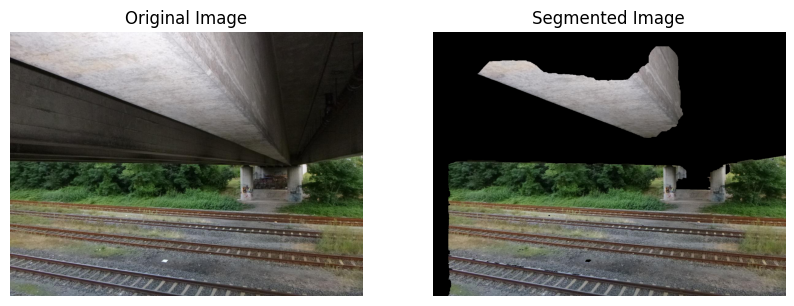

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0050.jpg"
image_path = path + file
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize mask
mask = np.zeros(image.shape[:2], np.uint8)

# Create temporary arrays used by the algorithm
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define the rectangle around the object you want to segment
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)  # You might need to adjust this

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask such that 0 and 2 pixels are converted to the background
# and 1 and 3 pixels are converted to the foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Multiply the input image with the new mask to get the segmented image
segmented_image = image_rgb * mask2[:, :, np.newaxis]


# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()





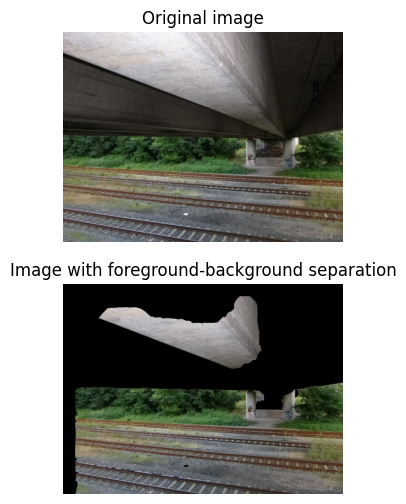

In [5]:
# Display the original and segmented images
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Display image 1
axes[0].imshow(image_rgb)
axes[0].axis('off')
axes[0].set_title('Original image')

# Display image 2
axes[1].imshow(segmented_image)
axes[1].axis('off')
axes[1].set_title('Image with foreground-background separation')

# Show the plot
plt.show()

**Graph-based segmentation approach for foreground-background-separation**

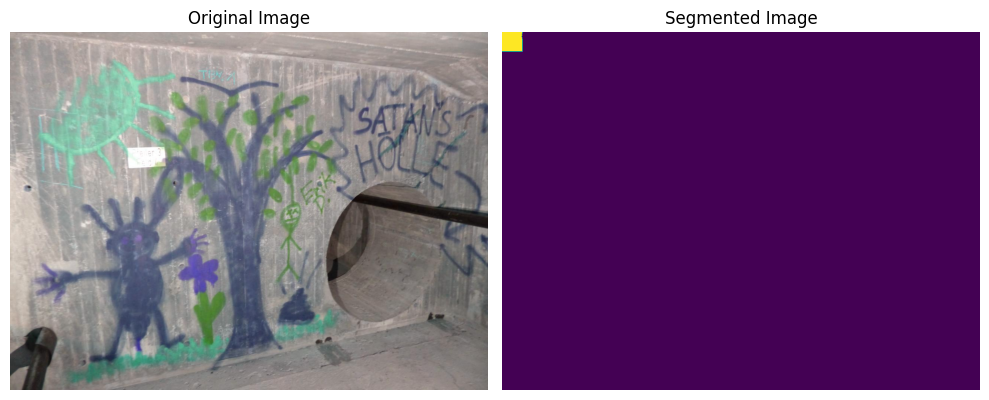